## Company Size Analysis

### Package Import

In [2]:
import math
# import sys
# from datetime import datetime
# from datetime import timedelta
# import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(1000)

### Data Clean

In [33]:
# LOAD DATA
df = pd.read_excel("../data/champions_group_data.xlsx")
print("Shape:", df.shape)   # .shape returns the (rows, columns) of the DataFrame
df.head()   # shows first 5 rows of df

Shape: (8559, 72)


,DUNS Number,Company Sites,Website,Address Line 1,City,State,State Or Province Abbreviation,Postal Code,Country,Phone Number,...,ISIC Rev 4 Code,ISIC Rev 4 Description,IT Budget,IT spend,No. of PC,No. of Desktops,No. of Laptops,No. of Routers,No. of Servers,No. of Storage Devices
0,639677726,"Zyf Lopsking Material Technology Co., Ltd. No....",NaN,"No.2777 Taidong Road, Panyang Industrial Park,...",Suzhou,Jiangsu,JS,215000.0,CHINA,NaN,...,4662.0,Wholesale of metals and metal ores,0,0,1 to 10,1 to 10,1 to 10,1 to 10,NaN,NaN
1,547756179,"Beijing Kaishi Lide Commerce And Trade Co., Lt...",NaN,"No.306, Building 8, Shuangyushudongli Jia, Hai...",Beijing,Beijing,BJ,100086.0,CHINA,1.082129e+09,...,NaN,NaN,5601,3472,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10
2,728834216,Keshan Shengren Potato Industry Processing Co....,NaN,"South of Siduan Road, Xi Street, Keshan Town, ...",Qiqihar,Heilongjiang,HL,161000.0,CHINA,NaN,...,NaN,NaN,86905,53881,11 to 50,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10
3,728791839,Zuoquan County Yuanfeng Agriculture Technology...,NaN,"Songaoliang Village, Liaoyang Town, Zuoquan Co...",Jinzhong,Shanxi,SX,30600.0,CHINA,NaN,...,NaN,NaN,11630,7210,NaN,NaN,NaN,NaN,NaN,NaN
4,728889244,Zuoquan County Tianxin Real Estate Development...,NaN,"No.14, Chengyadao Alley, Zuoquan County ...",Jinzhong,Shanxi,SX,30600.0,CHINA,3.548653e+09,...,NaN,NaN,94564,58629,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10


To analyze the company size, we will use company sites, No. of Desktops, No. of Laptops, No. of Servers, No. of Storage Devices and No. of Routers. 

In [34]:
df = df[['Company Sites', 'No. of Desktops', 'No. of Laptops', 'No. of Servers', 'No. of Storage Devices', 'No. of Routers']]
df.shape
df.head(10)

,Company Sites,No. of Desktops,No. of Laptops,No. of Servers,No. of Storage Devices,No. of Routers
0,"Zyf Lopsking Material Technology Co., Ltd. No....",1 to 10,1 to 10,NaN,NaN,1 to 10
1,"Beijing Kaishi Lide Commerce And Trade Co., Lt...",1 to 10,1 to 10,1 to 10,1 to 10,1 to 10
2,Keshan Shengren Potato Industry Processing Co....,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10
3,Zuoquan County Yuanfeng Agriculture Technology...,NaN,NaN,NaN,NaN,NaN
4,Zuoquan County Tianxin Real Estate Development...,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10
5,Zuoquan County People's Hospital ...,1 to 10,1 to 10,NaN,NaN,NaN
6,"Zuoquan County Huixiang Meihua Co., Ltd. ...",1 to 10,NaN,1 to 10,1 to 10,11 to 50
7,Shiliuyuan Branch of Beijing Zuolin Youshe Cat...,1 to 10,1 to 10,NaN,NaN,1 to 10
8,"Zhijin County Zhongba Coal Supply Co., Ltd. ...",1 to 10,NaN,1 to 10,1 to 10,11 to 50
9,"Zunyi Yurui Construction Engineering Co., Ltd....",1 to 10,1 to 10,1 to 10,1 to 10,NaN


<class 'pandas.DataFrame'>
RangeIndex: 8559 entries, 0 to 8558
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Company Sites           8559 non-null   str  
 1   No. of Desktops         8218 non-null   str  
 2   No. of Laptops          7920 non-null   str  
 3   No. of Servers          5210 non-null   str  
 4   No. of Storage Devices  5126 non-null   str  
 5   No. of Routers          5260 non-null   str  
dtypes: str(6)
memory usage: 401.3 KB
Numeric columns: []
Categorical/Text columns: ['Company Sites', 'No. of Desktops', 'No. of Laptops', 'No. of Servers', 'No. of Storage Devices', 'No. of Routers']


C:\Users\Hu\AppData\Local\Temp\ipykernel_30508\3805332639.py:4: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include=["object"]).columns.tolist()


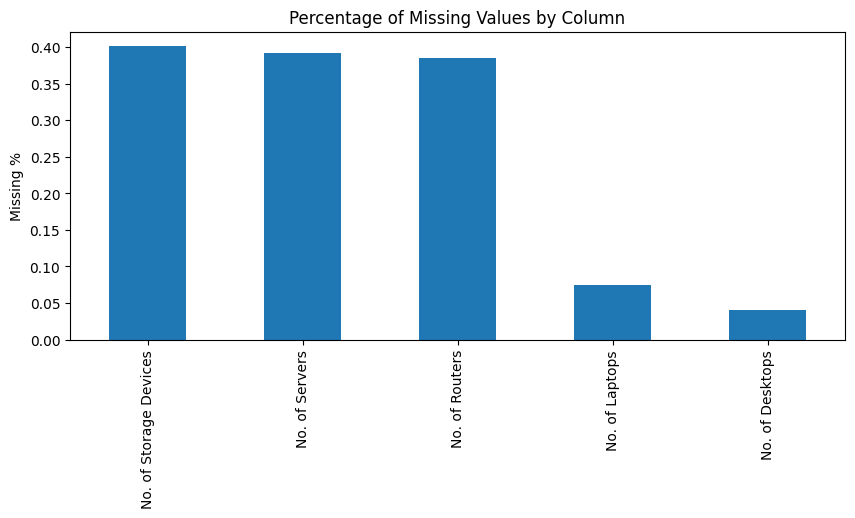

In [35]:
# DATA ORIENTATION
df.info()   # gives structural summary of df
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Numeric columns:", numeric_cols)
print("Categorical/Text columns:", cat_cols)

# MISSING DATA ANALYSIS
missing_pct = df.isnull().mean().sort_values(ascending=False) # sorted columns by percentage of missing values
missing_pct[missing_pct > 0]

plt.figure(figsize=(10,4))    # creates new figure to display plot
missing_pct[missing_pct > 0].plot(kind="bar")
plt.title("Percentage of Missing Values by Column")
plt.ylabel("Missing %")
plt.grid(False)
plt.show()

In [ ]:
# Transfer Company Sites to Count of Company Sites
df['company_sites_clean'] = df['Company_Sites'].fillna('').astype(str)
df['company_site_count'] = (
    df['company_sites_clean']
    .apply(
        lambda x: len([s for s in x.split(',') if s.strip() != ''])
    )
)
df['company_site_count'].value_counts().sort_index()
df[['Company Sites', 'company_site_count']].sample(10)

,Company Sites,company_site_count
5270,Yulin Dongfang Group Fuxing Car Sales Service ...,2
655,"Zhongyan (Shanghai) International Trade Co., L...",2
3012,Zhejiang Bolei Heavy Machine Tool Manufacturin...,2
2834,"Zhejiang Hanxiang Construction Co., Ltd. Jings...",2
8433,"Xi'an Zhonghao Finance & Taxation Office Co., ...",2
7528,"Xi'An Tuoxiaobao Internet Technology Co., Ltd....",2
3573,"Yuxi Lanjia Commerce and Trade Co., Ltd. No.47...",2
4705,"Yunnan Herongze Architecture Engineering Co., ...",2
4217,"Yunnan Renqiao Medical Technology Co., Ltd. ...",2
1474,Heilongjiang Wancheng Architecture Engineering...,2


In [37]:
df.columns.tolist()

['Company Sites',
 'No. of Desktops',
 'No. of Laptops',
 'No. of Servers',
 'No. of Storage Devices',
 'No. of Routers',
 'company_sites_clean',
 'company_site_count']

In [38]:
asset_cols = [
    'No. of Desktops',
    'No. of Laptops',
    'No. of Servers',
    'No. of Storage Devices',
    'No. of Routers'
]

def range_to_midpoint(x):
    if pd.isna(x):
        return np.nan
    if '+' in x:
        return int(x.replace('+', '')) * 1.5
    low, high = x.split(' to ')
    return (int(low) + int(high)) / 2

for col in asset_cols:
    df[col + '_num'] = df[col].apply(range_to_midpoint)

num_cols = [c + '_num' for c in asset_cols]
df[num_cols] = df[num_cols].fillna(0)

df.head(10)


,Company Sites,No. of Desktops,No. of Laptops,No. of Servers,No. of Storage Devices,No. of Routers,company_sites_clean,company_site_count,No. of Desktops_num,No. of Laptops_num,No. of Servers_num,No. of Storage Devices_num,No. of Routers_num
0,"Zyf Lopsking Material Technology Co., Ltd. No....",1 to 10,1 to 10,NaN,NaN,1 to 10,"Zyf Lopsking Material Technology Co., Ltd. No....",2,5.5,5.5,0.0,0.0,5.5
1,"Beijing Kaishi Lide Commerce And Trade Co., Lt...",1 to 10,1 to 10,1 to 10,1 to 10,1 to 10,"Beijing Kaishi Lide Commerce And Trade Co., Lt...",2,5.5,5.5,5.5,5.5,5.5
2,Keshan Shengren Potato Industry Processing Co....,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10,Keshan Shengren Potato Industry Processing Co....,2,5.5,5.5,5.5,5.5,5.5
3,Zuoquan County Yuanfeng Agriculture Technology...,NaN,NaN,NaN,NaN,NaN,Zuoquan County Yuanfeng Agriculture Technology...,2,0.0,0.0,0.0,0.0,0.0
4,Zuoquan County Tianxin Real Estate Development...,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10,Zuoquan County Tianxin Real Estate Development...,2,5.5,5.5,5.5,5.5,5.5
5,Zuoquan County People's Hospital ...,1 to 10,1 to 10,NaN,NaN,NaN,Zuoquan County People's Hospital ...,1,5.5,5.5,0.0,0.0,0.0
6,"Zuoquan County Huixiang Meihua Co., Ltd. ...",1 to 10,NaN,1 to 10,1 to 10,11 to 50,"Zuoquan County Huixiang Meihua Co., Ltd. ...",2,5.5,0.0,5.5,5.5,30.5
7,Shiliuyuan Branch of Beijing Zuolin Youshe Cat...,1 to 10,1 to 10,NaN,NaN,1 to 10,Shiliuyuan Branch of Beijing Zuolin Youshe Cat...,2,5.5,5.5,0.0,0.0,5.5
8,"Zhijin County Zhongba Coal Supply Co., Ltd. ...",1 to 10,NaN,1 to 10,1 to 10,11 to 50,"Zhijin County Zhongba Coal Supply Co., Ltd. ...",2,5.5,0.0,5.5,5.5,30.5
9,"Zunyi Yurui Construction Engineering Co., Ltd....",1 to 10,1 to 10,1 to 10,1 to 10,NaN,"Zunyi Yurui Construction Engineering Co., Ltd....",2,5.5,5.5,5.5,5.5,0.0


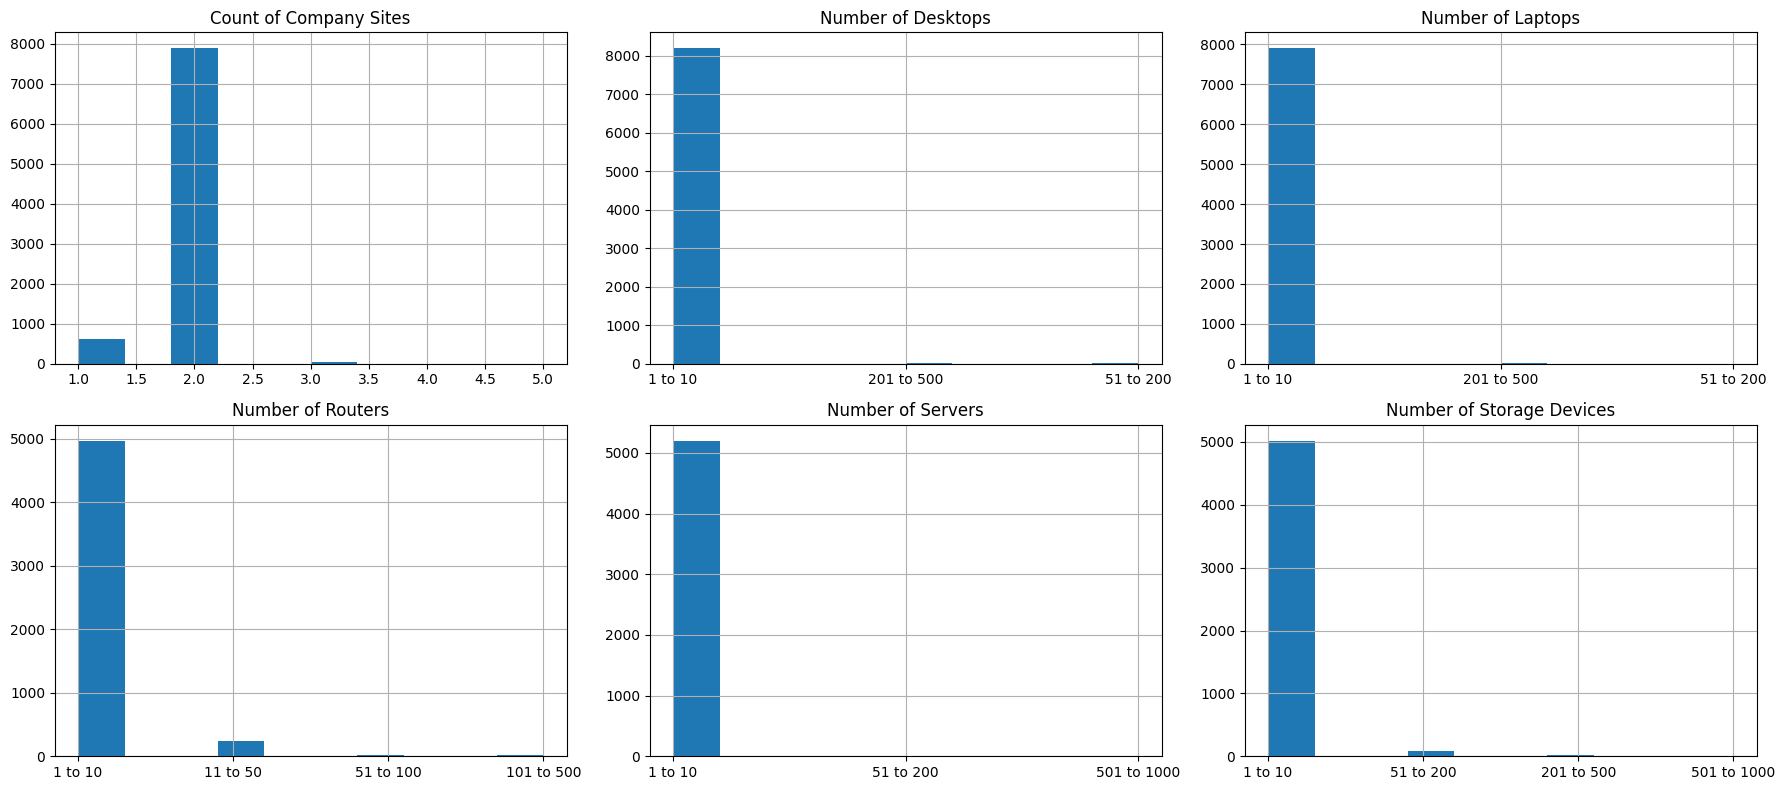

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

df['company_site_count'].hist(ax=axes[0, 0])
axes[0, 0].set_title("Count of Company Sites")

df['No. of Desktops'].hist(ax=axes[0, 1])
axes[0, 1].set_title("Number of Desktops")

df['No. of Laptops'].hist(ax=axes[0, 2])
axes[0, 2].set_title("Number of Laptops")

df['No. of Routers'].hist(ax=axes[1, 0])
axes[1, 0].set_title("Number of Routers")

df['No. of Servers'].hist(ax=axes[1, 1])
axes[1, 1].set_title("Number of Servers")

df['No. of Storage Devices'].hist(ax=axes[1, 2])
axes[1, 2].set_title("Number of Storage Devices")

plt.tight_layout()
plt.show()


#### We will introduce a new variable company_size to combine all six related variables. 
#### Let company_size = company_site_count * (No. of Desktops + No. of Servers + No. of Storage Devices + No. of Routers + No. of Laptops)

In [40]:
df['company_size'] = df['company_site_count'] * (df['No. of Desktops_num'] + df['No. of Servers_num'] + df['No. of Laptops_num'] + df['No. of Storage Devices_num'] + df['No. of Routers_num'])
df.describe()

,company_site_count,No. of Desktops_num,No. of Laptops_num,No. of Servers_num,No. of Storage Devices_num,No. of Routers_num,company_size
count,8559.000000,8559.000000,8559.000000,8559.000000,8559.000000,8559.000000,8559.000000
mean,1.932235,5.825914,5.481949,3.519103,5.431476,4.814815,47.736768
std,0.273615,12.171513,11.042456,9.102947,22.860886,13.982288,97.748392
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.500000,5.500000,0.000000,0.000000,0.000000,22.000000
50%,2.000000,5.500000,5.500000,5.500000,5.500000,5.500000,44.000000
75%,2.000000,5.500000,5.500000,5.500000,5.500000,5.500000,55.000000
max,5.000000,350.500000,350.500000,750.500000,750.500000,300.500000,2955.000000


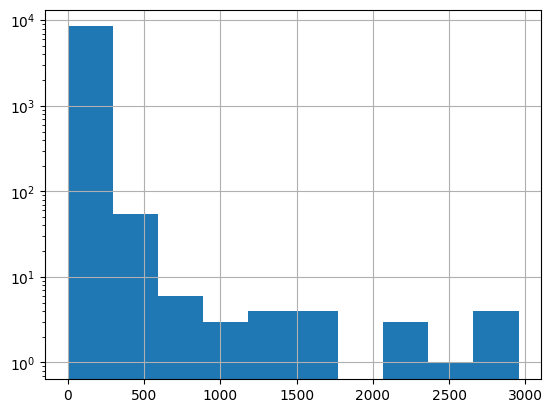

In [42]:
df['company_size'].hist(bins = 10, log = True)
plt.show()

In [43]:
df['company_size'].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    8559.000000
mean       47.736768
std        97.748392
min         0.000000
50%        44.000000
75%        55.000000
90%        55.000000
95%        55.000000
99%       238.000000
max      2955.000000
Name: company_size, dtype: float64

In [46]:
q50 = df['company_size'].quantile(0.5)
q75 = df['company_size'].quantile(0.75)

def size_tier(x):
    if x <= q50:
        return 'Small'
    elif x <= q75:
        return 'Mid'
    else:
        return 'Large'

df['size_tier'] = df['company_size'].apply(size_tier)
df['size_tier'].value_counts(normalize=True)
df.head(10)

,Company Sites,No. of Desktops,No. of Laptops,No. of Servers,No. of Storage Devices,No. of Routers,company_sites_clean,company_site_count,No. of Desktops_num,No. of Laptops_num,No. of Servers_num,No. of Storage Devices_num,No. of Routers_num,company_size,size_tier
0,"Zyf Lopsking Material Technology Co., Ltd. No....",1 to 10,1 to 10,NaN,NaN,1 to 10,"Zyf Lopsking Material Technology Co., Ltd. No....",2,5.5,5.5,0.0,0.0,5.5,33.0,Small
1,"Beijing Kaishi Lide Commerce And Trade Co., Lt...",1 to 10,1 to 10,1 to 10,1 to 10,1 to 10,"Beijing Kaishi Lide Commerce And Trade Co., Lt...",2,5.5,5.5,5.5,5.5,5.5,55.0,Mid
2,Keshan Shengren Potato Industry Processing Co....,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10,Keshan Shengren Potato Industry Processing Co....,2,5.5,5.5,5.5,5.5,5.5,55.0,Mid
3,Zuoquan County Yuanfeng Agriculture Technology...,NaN,NaN,NaN,NaN,NaN,Zuoquan County Yuanfeng Agriculture Technology...,2,0.0,0.0,0.0,0.0,0.0,0.0,Small
4,Zuoquan County Tianxin Real Estate Development...,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10,Zuoquan County Tianxin Real Estate Development...,2,5.5,5.5,5.5,5.5,5.5,55.0,Mid
5,Zuoquan County People's Hospital ...,1 to 10,1 to 10,NaN,NaN,NaN,Zuoquan County People's Hospital ...,1,5.5,5.5,0.0,0.0,0.0,11.0,Small
6,"Zuoquan County Huixiang Meihua Co., Ltd. ...",1 to 10,NaN,1 to 10,1 to 10,11 to 50,"Zuoquan County Huixiang Meihua Co., Ltd. ...",2,5.5,0.0,5.5,5.5,30.5,94.0,Large
7,Shiliuyuan Branch of Beijing Zuolin Youshe Cat...,1 to 10,1 to 10,NaN,NaN,1 to 10,Shiliuyuan Branch of Beijing Zuolin Youshe Cat...,2,5.5,5.5,0.0,0.0,5.5,33.0,Small
8,"Zhijin County Zhongba Coal Supply Co., Ltd. ...",1 to 10,NaN,1 to 10,1 to 10,11 to 50,"Zhijin County Zhongba Coal Supply Co., Ltd. ...",2,5.5,0.0,5.5,5.5,30.5,94.0,Large
9,"Zunyi Yurui Construction Engineering Co., Ltd....",1 to 10,1 to 10,1 to 10,1 to 10,NaN,"Zunyi Yurui Construction Engineering Co., Ltd....",2,5.5,5.5,5.5,5.5,0.0,44.0,Small
